In [1]:
#imports libraries
import pandas as pd
import numpy as np
import graphviz 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Do the plotting inline, instead of a seperate window
%matplotlib inline

In [4]:
# import dataset from xlsx file
dataset = pd.read_csv("customer_data.csv")
# print dataset dimension
print(dataset.shape)

(89973, 10)


In [5]:
dataset.head()

,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Buy_Amount_Grade,Special_Buyer,Last_Buy_Amount,Buy_Amount_Average,Class
0,3,9309,9409,0.06,1,G,0,50,30.00,0
1,0,9410,9503,0.20,4,E,0,5,8.75,0
2,6,9309,9503,0.13,2,G,0,25,22.50,0
3,0,9210,9411,0.10,1,G,0,25,12.50,0
4,2,9501,9509,0.14,2,F,0,5,7.75,0


In [6]:
# normalize First_Buy_Data & Last_Buy_Data columns
dataset[['First_Buy_Data']] = normalize(dataset[['First_Buy_Data']], axis=0)
dataset[['Last_Buy_Data']] = normalize(dataset[['Last_Buy_Data']], axis=0)

In [5]:
dataset.head()

,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Buy_Amount_Grade,Special_Buyer,Last_Buy_Amount,Buy_Amount_Average,Class
0,3,0.003433,0.003320,0.06,1,G,0,50,30.00,0
1,0,0.003470,0.003353,0.20,4,E,0,5,8.75,0
2,6,0.003433,0.003353,0.13,2,G,0,25,22.50,0
3,0,0.003396,0.003321,0.10,1,G,0,25,12.50,0
4,2,0.003503,0.003355,0.14,2,F,0,5,7.75,0


# One-Hot

In [7]:
dfGradeDummies = pd.get_dummies(dataset['Buy_Amount_Grade'], prefix='grade')
dataset = pd.concat([dataset, dfGradeDummies],axis=1)
dataset.drop(['Buy_Amount_Grade'],axis=1, inplace=True)
dataset.head()

,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Special_Buyer,Last_Buy_Amount,Buy_Amount_Average,Class,grade_D,grade_E,grade_F,grade_G
0,3,0.003433,0.003320,0.06,1,0,50,30.00,0,0,0,0,1
1,0,0.003470,0.003353,0.20,4,0,5,8.75,0,0,1,0,0
2,6,0.003433,0.003353,0.13,2,0,25,22.50,0,0,0,0,1
3,0,0.003396,0.003321,0.10,1,0,25,12.50,0,0,0,0,1
4,2,0.003503,0.003355,0.14,2,0,5,7.75,0,0,0,1,0


In [13]:
df_special_buyer_dummies = pd.get_dummies(dataset['Special_Buyer'], prefix='special_buyer')
dataset = pd.concat([dataset, df_special_buyer_dummies],axis=1)
dataset.drop(['Special_Buyer'],axis=1, inplace=True)
dataset.head()

,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Last_Buy_Amount,Buy_Amount_Average,Class,grade_D,grade_E,grade_F,grade_G,special_buyer_0,special_buyer_X
0,3,0.003433,0.003320,0.06,1,50,30.00,0,0,0,0,1,1,0
1,0,0.003470,0.003353,0.20,4,5,8.75,0,0,1,0,0,1,0
2,6,0.003433,0.003353,0.13,2,25,22.50,0,0,0,0,1,1,0
3,0,0.003396,0.003321,0.10,1,25,12.50,0,0,0,0,1,1,0
4,2,0.003503,0.003355,0.14,2,5,7.75,0,0,0,1,0,1,0


In [14]:
dataset.shape

(89973, 14)

# Correlation

In [15]:
# Plotting correlation function
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Display:
        matrix of correlation between columns. Purple-to-yellow => less to more correlated
                                               0 ----------------> 1
                                               Expect a yellow line running from the top left to bottom right
    """
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

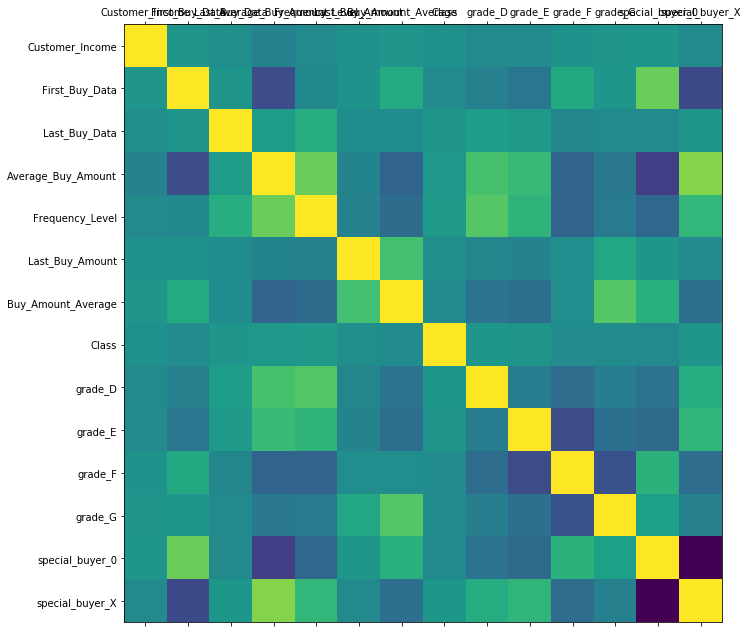

In [16]:
plot_corr(dataset)

# Train and test split

In [25]:
# prediction features columns
feature_col_names = ['Customer_Income', 'First_Buy_Data', 'Last_Buy_Data', 'Average_Buy_Amount', 'Frequency_Level', 
          'grade_D', 'grade_E', 'grade_F', 'grade_G', 'special_buyer_0', 'special_buyer_X', 'Last_Buy_Amount', 'Buy_Amount_Average']
# prediction class column 
predicted_class_names = ['Class']
# get feature columns values from dataset
X = dataset[feature_col_names].values
# get class column values from dataset
y = dataset[predicted_class_names].values  
# split dataset features and prediction class to test and train parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print length of test and train parts
print('{0}% in training set'.format(len(X_train) / len(dataset.index) * 100))
print('{0}% in testing set'.format(len(X_test) / len(dataset.index) * 100))

69.99988885554555% in training set
30.00011114445445% in testing set


In [22]:
print(len(X_train) , len(dataset.index))

62981 89973


In [18]:
print(dataset.index)

RangeIndex(start=0, stop=89973, step=1)


# decision

# #DecisionTree

In [26]:
# Create DecisionTreeClassifier model object and train it with data
classifier = DecisionTreeClassifier()  
# Actual training
classifier.fit(X_train, y_train)  
# predicted values using the training data
y_pred = classifier.predict(X_test)  
# accuracy
print(metrics.accuracy_score(y_test, y_pred))
print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))

print('Confusion matrix:')
# Note the use of labels for set 1=True, and 0=False to lower right
print(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]))
print('Classification report:')
print(metrics.classification_report(y_test, y_pred))

0.8953764078245406
Accuracy: 89.54%
Confusion matrix:
[[   89  1240]
 [ 1584 24079]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     25663
           1       0.05      0.07      0.06      1329

    accuracy                           0.90     26992
   macro avg       0.50      0.50      0.50     26992
weighted avg       0.91      0.90      0.90     26992



In [27]:
print(metrics.accuracy_score(y_test, y_pred))

0.8953764078245406


In [28]:
# visualize decision tree
graph = Source(tree.export_graphviz(classifier, feature_names=feature_col_names, class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

# Random Forest

In [34]:
rf = RandomForestClassifier() # Creating random forest object
rf.fit(X_train, y_train)

c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
# Let's look at the performance on training data
# Predict values using the training data
rf_predict_train = rf.predict(X_train)

# Accuracy
print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_train, rf_predict_train) * 100))

Accuracy: 98.52%


In [46]:
print(metrics.accuracy_score(y_test, rf_predict_test))

0.9495406046235921


In [47]:
# Predict values using the testing data
rf_predict_test = rf.predict(X_test)

# Accuracy
print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_test, rf_predict_test) * 100))

Accuracy: 94.95%


# Logistic Regression

In [54]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_predict_test = logistic_model.predict(X_test)

print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_test, logistic_predict_test) * 100))
print()
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, logistic_predict_test, labels=[1,0]))
print()
print('Classification report:')
print(metrics.classification_report(y_test, logistic_predict_test, labels=[1,0]))

c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 95.07%

Confusion matrix:
[[    0  1329]
 [    1 25662]]

Classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1329
           0       0.95      1.00      0.97     25663

    accuracy                           0.95     26992
   macro avg       0.48      0.50      0.49     26992
weighted avg       0.90      0.95      0.93     26992



In [53]:
print(metrics.accuracy_score(y_test, logistic_predict_test))

0.9507261410788381


# Logistic Regression (Cross Validation)

In [ ]:
#n_jobs=-1, Cs=3, cv=10, refit=True, class_weight='balanced', random_state=42

In [81]:
logisticcv = LogisticRegressionCV(n_jobs=-1, Cs=3, cv=10, refit=True, class_weight='balanced', random_state=42)
logisticcv.fit(X_train, y_train)

c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [82]:
y_p = logisticcv.predict(X_test)
print(metrics.accuracy_score(y_test, y_p))

0.6104401304090101


In [83]:
logisticcv = LogisticRegressionCV()
logisticcv.fit(X_train, y_train)
y_p = logisticcv.predict(X_test)
print(metrics.accuracy_score(y_test, y_p))

c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9507631890930646
